In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn-whitegrid") # Plot style
# allows to output plots in the notebook

In [3]:
import json

In [4]:
import glob

In [5]:
from matplotlib.ticker import MaxNLocator

In [6]:
#read and return scores from json files in the serialization directory
def return_scores(folder_name):
    metrics_files = glob.glob('final_experiments/'+folder_name+'/metrics_epoch_*.json')
    metrics_files_sorted = sorted(metrics_files,key=lambda f: int(''.join(filter(str.isdigit, f))))
    train_f1 = []
    train_loss = []
    val_f1 = []
    val_loss = []
    for file in metrics_files_sorted:
        with open(file) as json_file:  
            data = json.load(json_file)
        train_f1.append(data['training_f1'])
        train_loss.append(data['training_loss'])
        val_f1.append(data['validation_f1'])
        val_loss.append(data['validation_loss'])      
    return train_f1, train_loss, val_f1, val_loss

In [7]:
train_f1_baseline, train_loss_baseline, val_f1_baseline, val_loss_baseline = return_scores('baseline_final')

In [8]:
train_f1_fasttext, train_loss_fasttext, val_f1_fasttext, val_loss_fasttext = return_scores('fasttext_final')

In [9]:
train_f1_bidaf, train_loss_bidaf, val_f1_bidaf, val_loss_bidaf = return_scores('bidaf_mod_final')

In [45]:
train_f1_elmo, train_loss_elmo, val_f1_elmo, val_loss_elmo = return_scores('elmo_final')

In [27]:
plt.rcParams.update({'font.size': 12})

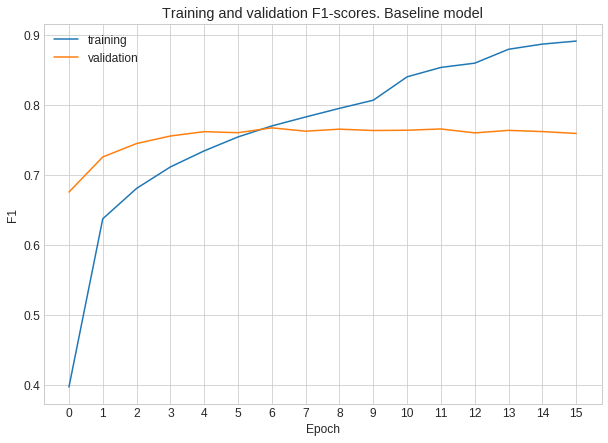

In [30]:
fig = plt.figure(figsize=(10,7))
plt.plot(train_f1_baseline, label = 'training')
plt.plot(val_f1_baseline, label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.xticks(range(16))
plt.title('Training and validation F1-scores. Baseline model')
plt.legend()
plt.savefig('baseline_f1.png')
plt.show()

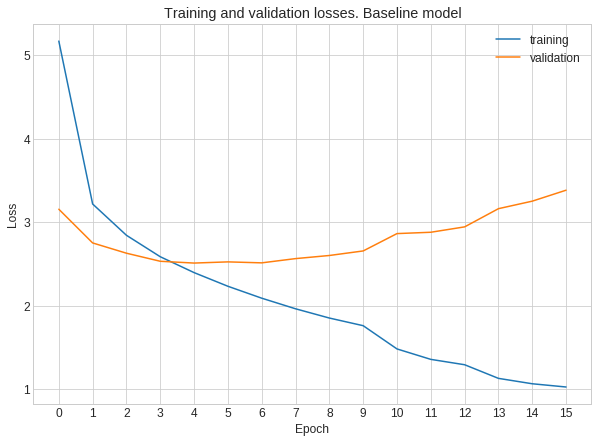

In [31]:
fig = plt.figure(figsize=(10,7))
plt.plot(train_loss_baseline, label = 'training')
plt.plot(val_loss_baseline, label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(16))
plt.title('Training and validation losses. Baseline model')
plt.legend()
plt.savefig('baseline_loss.png')
plt.show()

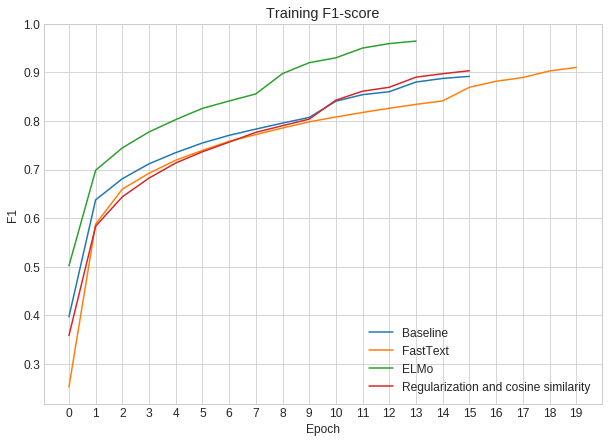

In [46]:
fig = plt.figure(figsize=(10,7))
plt.plot(train_f1_baseline, label = 'Baseline')
plt.plot(train_f1_fasttext, label = 'FastText')
plt.plot(train_f1_elmo, label = 'ELMo')
plt.plot(train_f1_bidaf, label = 'Regularization and cosine similarity')
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.xticks(range(20))
plt.title('Training F1-score')
plt.legend()
plt.savefig('train_f1.png')
plt.show()

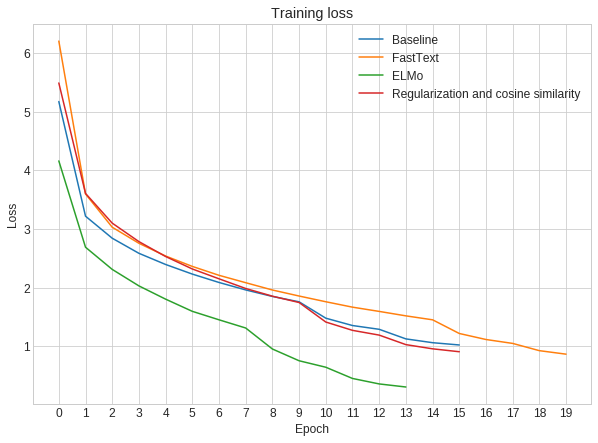

In [47]:
fig = plt.figure(figsize=(10,7))
plt.plot(train_loss_baseline, label = 'Baseline')
plt.plot(train_loss_fasttext, label = 'FastText')
plt.plot(train_loss_elmo, label = 'ELMo')
plt.plot(train_loss_bidaf, label = 'Regularization and cosine similarity')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(20))
plt.title('Training loss')
plt.legend()
plt.savefig('train_loss.png')
plt.show()

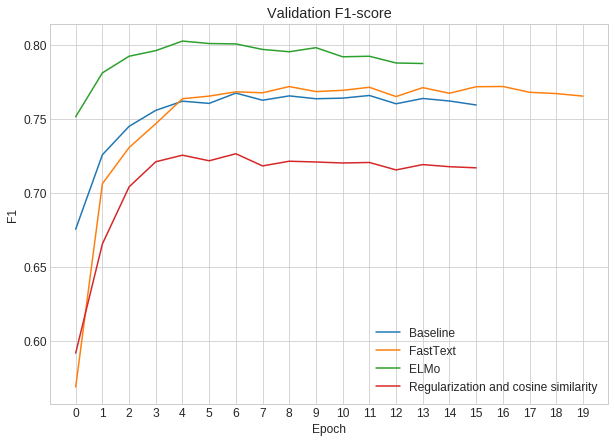

In [48]:
fig = plt.figure(figsize=(10,7))
plt.plot(val_f1_baseline, label = 'Baseline')
plt.plot(val_f1_fasttext, label = 'FastText')
plt.plot(val_f1_elmo, label = 'ELMo')
plt.plot(val_f1_bidaf, label = 'Regularization and cosine similarity')
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.xticks(range(20))
plt.title('Validation F1-score')
plt.legend()
plt.savefig('val_f1.png')
plt.show()

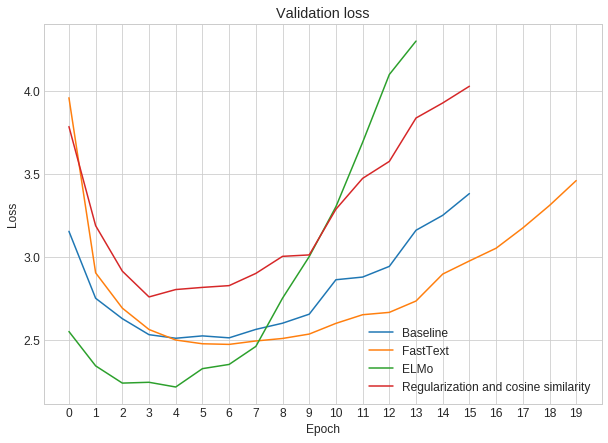

In [49]:
fig = plt.figure(figsize=(10,7))
plt.plot(val_loss_baseline, label = 'Baseline')
plt.plot(val_loss_fasttext, label = 'FastText')
plt.plot(val_loss_elmo, label = 'ELMo')
plt.plot(val_loss_bidaf, label = 'Regularization and cosine similarity')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(20))
plt.title('Validation loss')
plt.legend()
plt.savefig('val_loss.png')
plt.show()